In [169]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [124]:
## Source fred
## https://fred.stlouisfed.org/series/GDPC1
gdp_file = '../Data/GDPC1.csv'

In [86]:
df = pd.read_csv(gdp_file,parse_dates=['DATE'],index_col='DATE') #.reset_index().set_index('DATE')

In [87]:
df.tail()

,GDPC1
DATE,
2017-04-01,17995.150
2017-07-01,18120.843
2017-10-01,18223.758
2018-01-01,18323.963
2018-04-01,18511.576


In [88]:
df.tail(10)

,GDPC1
DATE,
2016-01-01,17523.374
2016-04-01,17622.486
2016-07-01,17706.705
2016-10-01,17784.185
2017-01-01,17863.023
2017-04-01,17995.150
2017-07-01,18120.843
2017-10-01,18223.758
2018-01-01,18323.963


In [89]:
## YoY Calc
dt = df.rolling(window=5).apply(lambda x: 100.0 * (x[-1]/x[0] - 1),raw = True)

In [90]:
dt.tail()

,GDPC1
DATE,
2017-04-01,2.114707
2017-07-01,2.338877
2017-10-01,2.471707
2018-01-01,2.580414
2018-04-01,2.869807


In [149]:
'{:.2%}'.format(3.5534/100)

'3.55%'

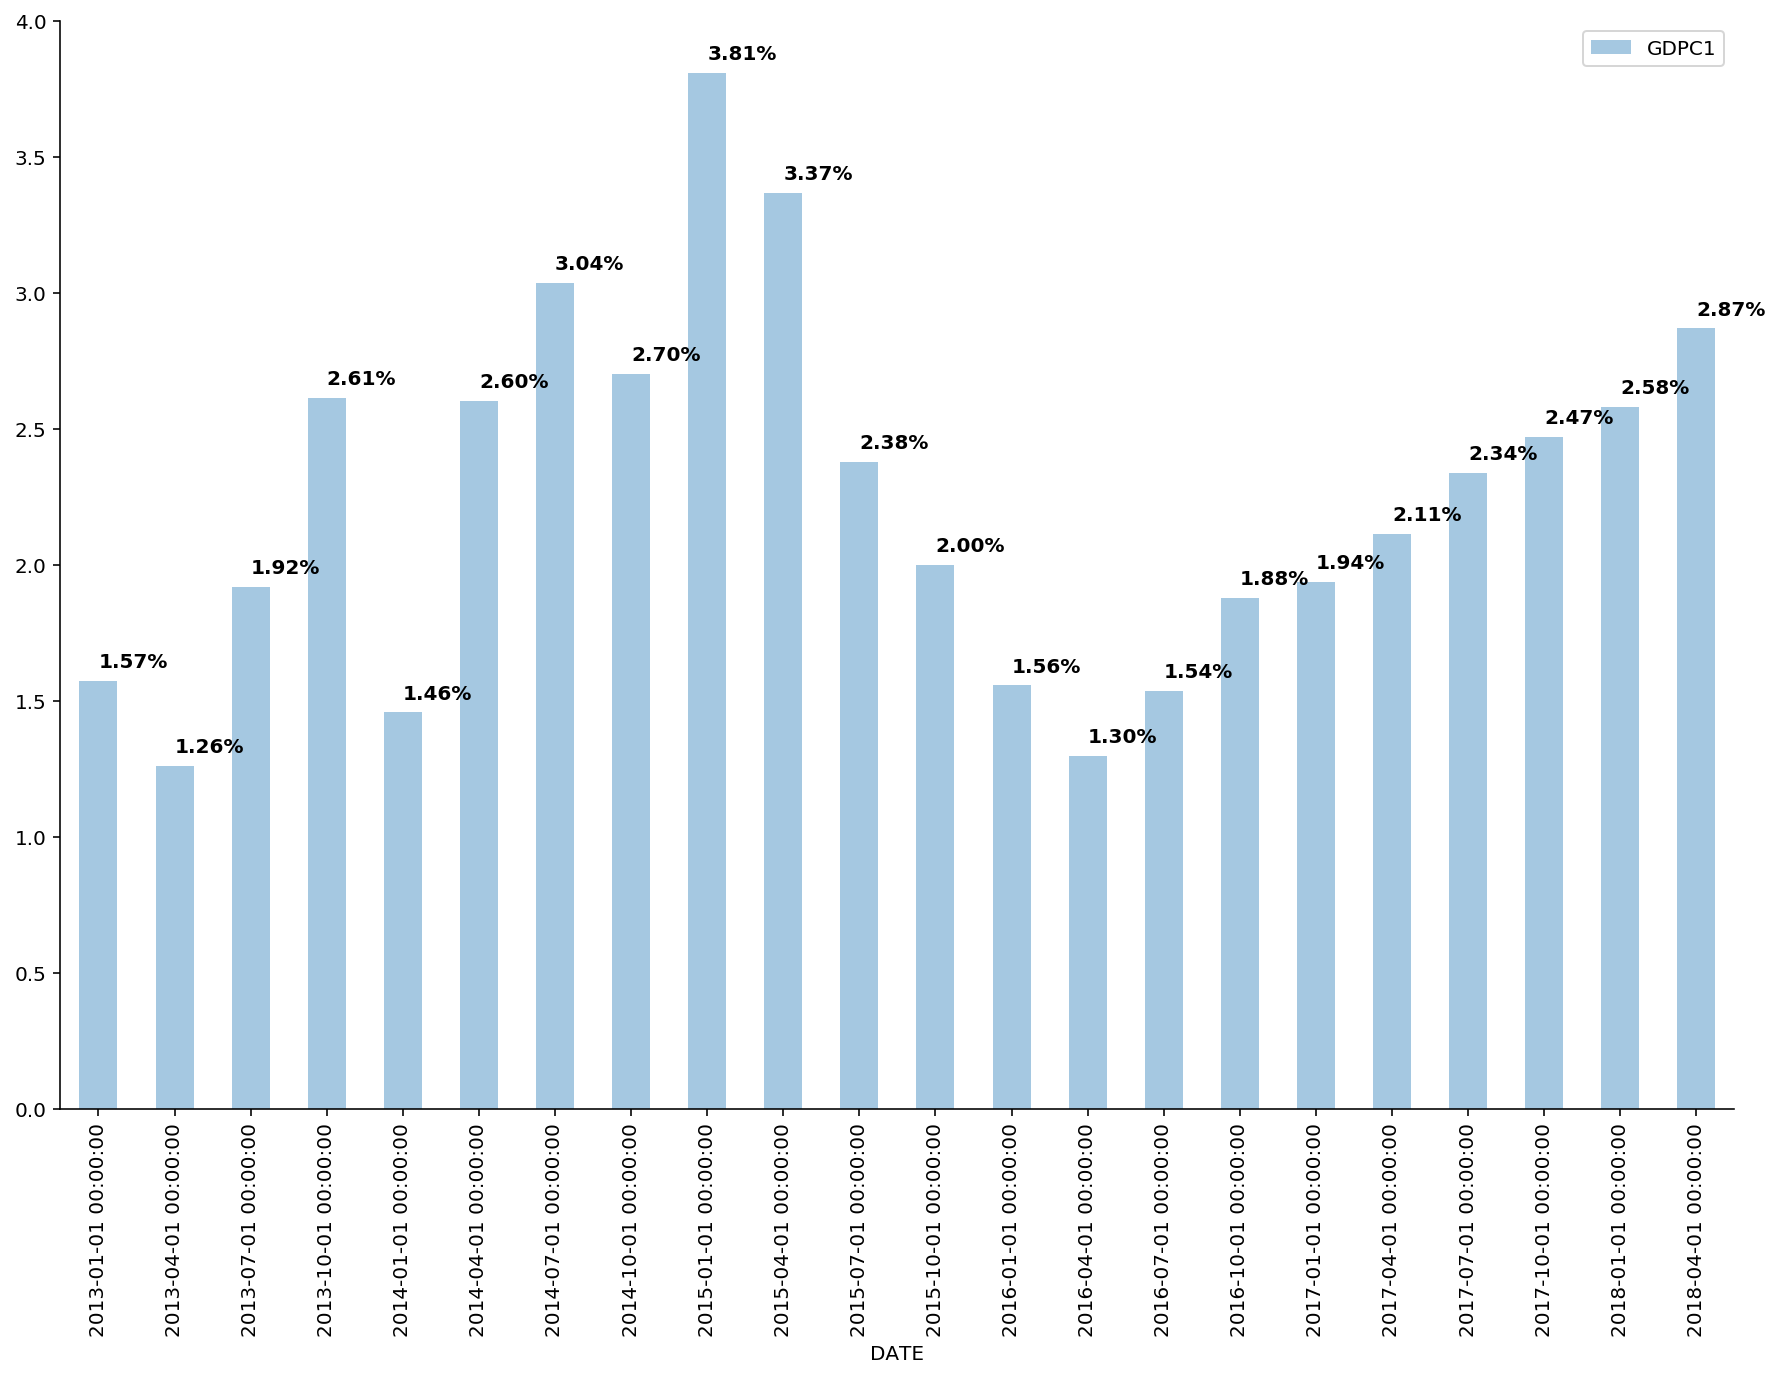

In [170]:
res = dt['2013':].plot.bar(figsize = (15,10),alpha = 0.4);
#res.text(x=0,y=3,s='Amitesh')
for idx , val in enumerate(dt['2013':].values):
    caption = '{:.2%}'.format(val[0]/100)
    res.text(x=idx,y=val + 0.05,s=caption, color = 'black',weight='bold')
sns.despine()

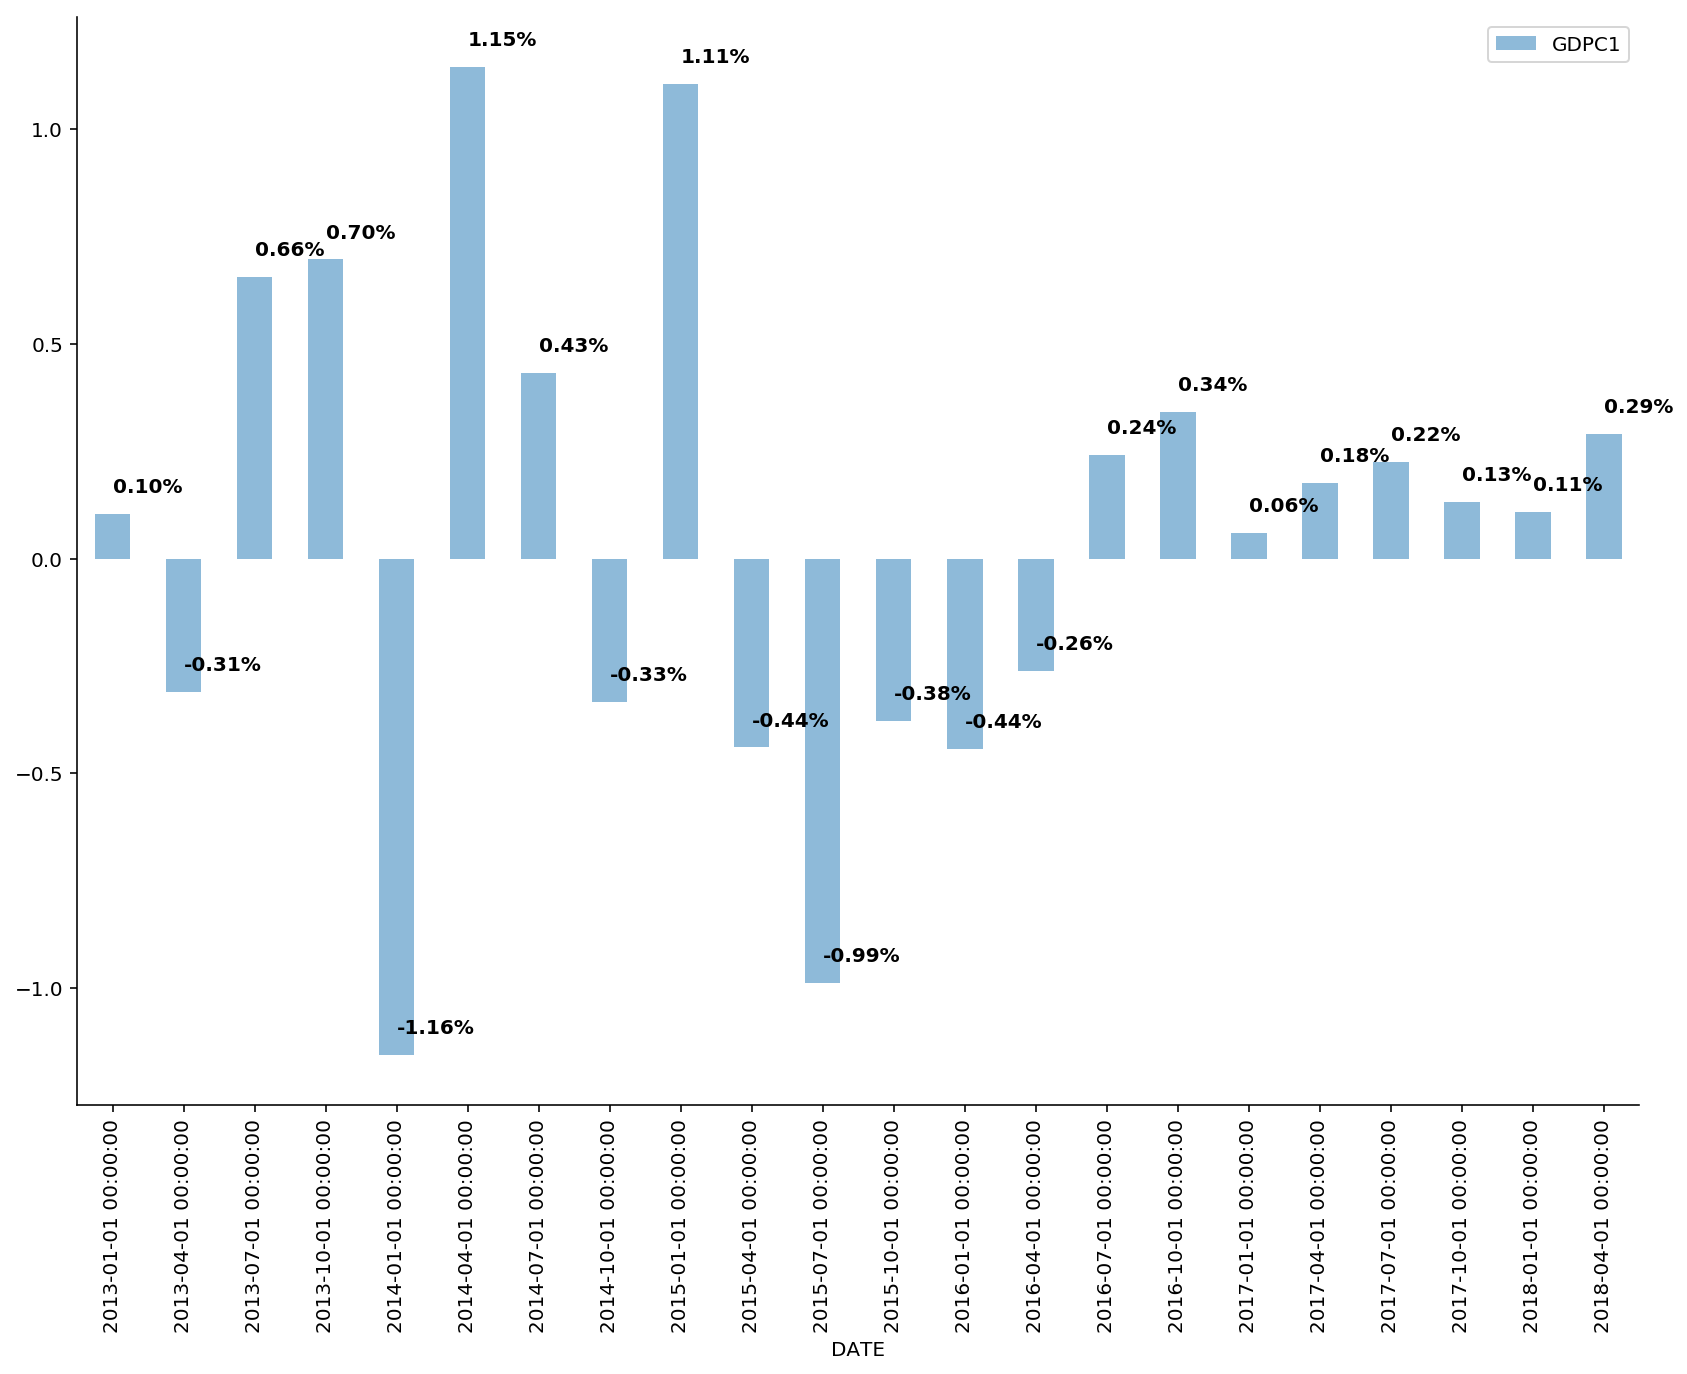

In [171]:
## I dont see much pattern
res = dt.diff().loc['2013':].plot.bar(figsize=(14, 10), alpha = 0.5);
for idx , val in enumerate(dt.diff().loc['2013':].values):
    caption = '{:.2%}'.format(val[0]/100)
    res.text(x=idx,y=val + 0.05,s=caption, color = 'black',weight='bold')
sns.despine()

In [102]:
dt_2Y = df.rolling(window=10).apply(lambda x: 100.0 * ((x[-1]/x[0]) ** 0.5 - 1),raw = True)

In [103]:
dt_2Y.tail()

,GDPC1
DATE,
2017-04-01,2.122979
2017-07-01,2.059081
2017-10-01,2.225830
2018-01-01,2.455326
2018-04-01,2.780998


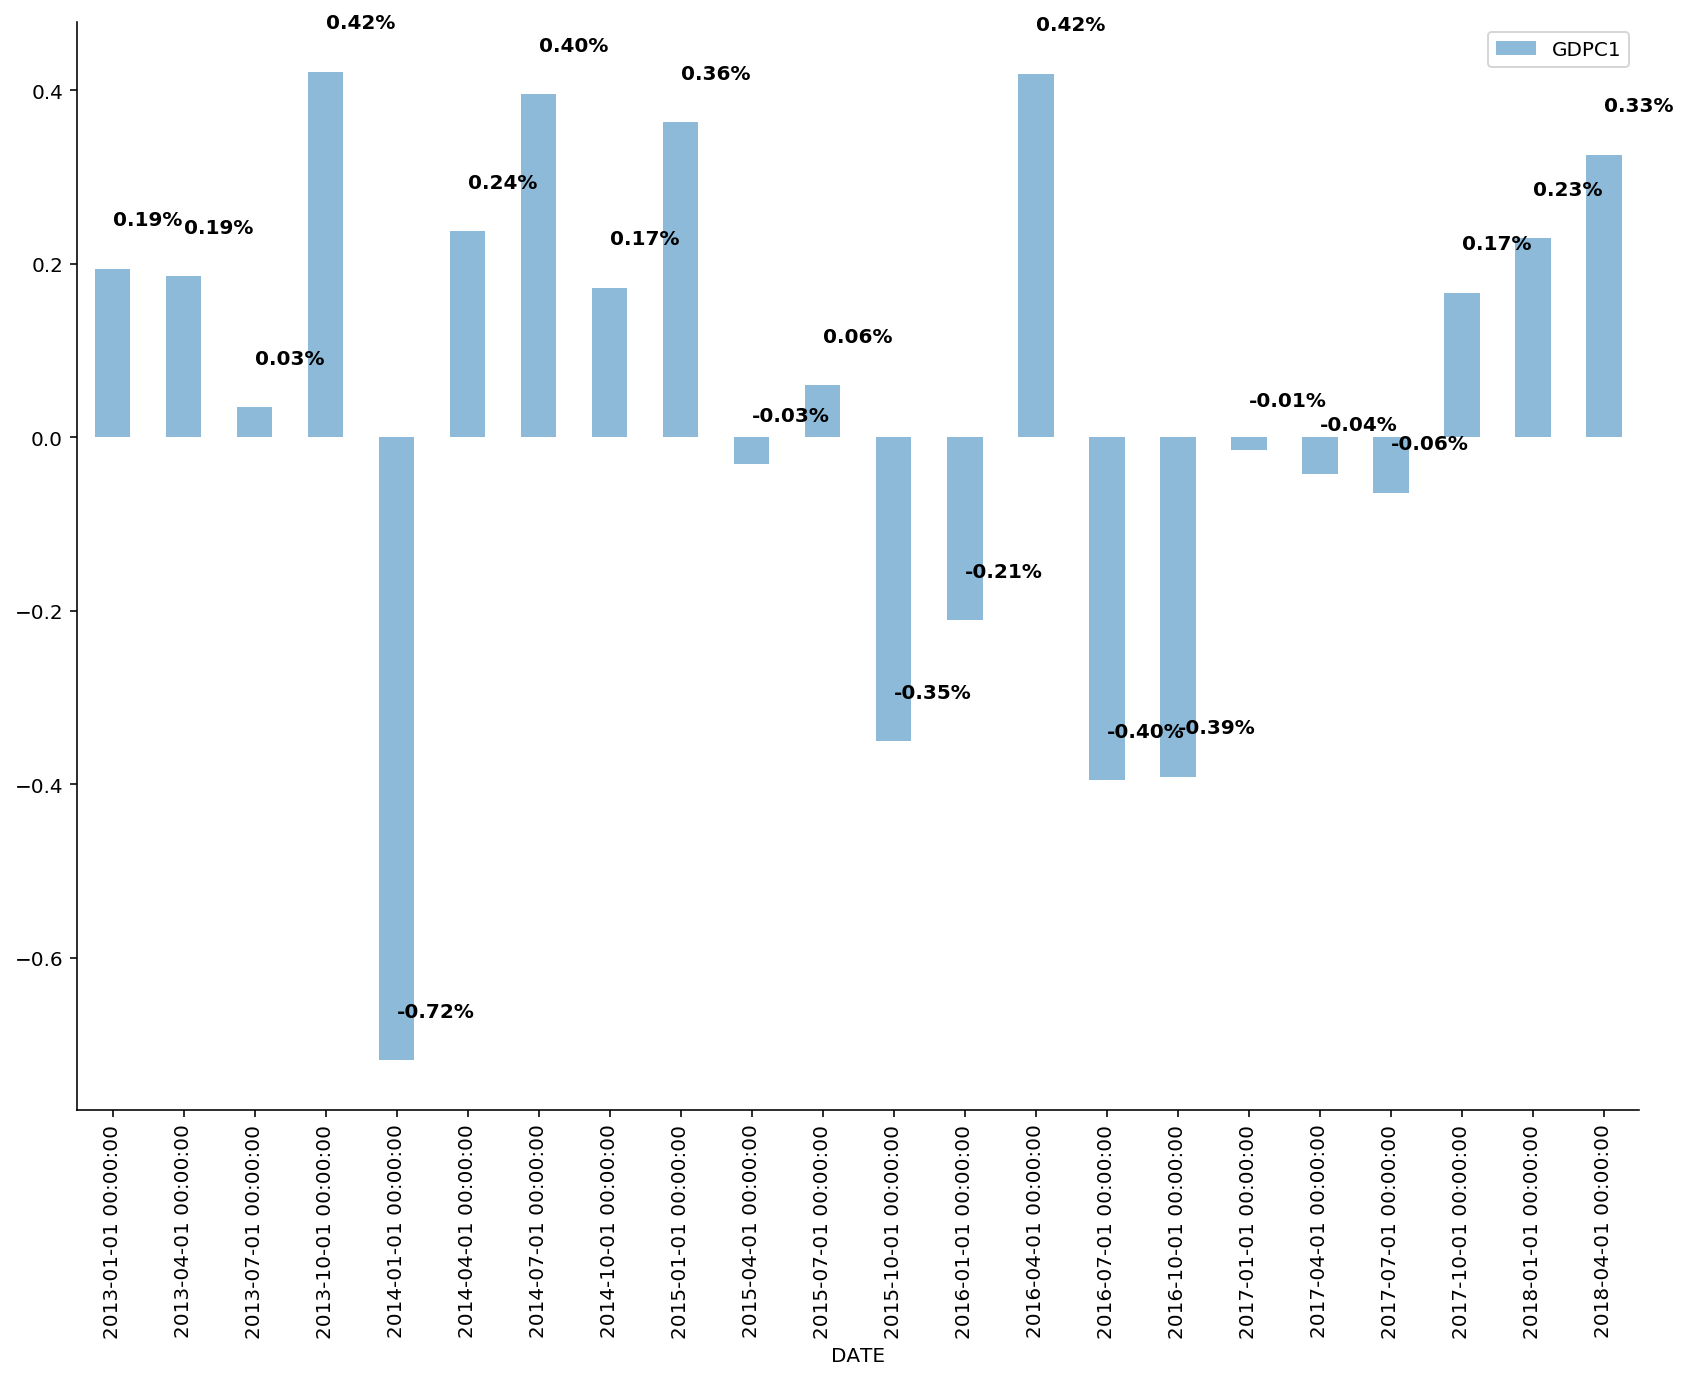

In [172]:
res = dt_2Y.diff().loc['2013':].plot.bar(figsize=(14, 10), alpha = 0.5);
for idx , val in enumerate(dt_2Y.diff().loc['2013':].values):
    caption = '{:.2%}'.format(val[0]/100)
    res.text(x=idx,y=val + 0.05,s=caption, color = 'black',weight='bold')
sns.despine()